In [11]:
install.packages("deSolve")
library(deSolve)
# SIR model 
model_1 <- function(beta, gamma, S0, I0, R0, times) {
  
# calculation of differentiation equation
  equation_1 <- function(time, variables, parameters) {
  with(as.list(c(variables, parameters)), {
    dS <- -beta * I * S
    dI <-  beta * I * S - gamma * I
    dR <-  gamma * I
    return(list(c(dS, dI, dR)))
  })
  }
  
#values initial for parameters :
  par_val <- c(beta  = beta, gamma = gamma)

# starting values of variables:
  start_values <- c(S = S0, I = I0, R = R0)
  
# calculating the equation
  df1 <- as.data.frame(ode( start_values, times,  equation_1,  par_val))

# returning the output:
  return(df1)
}

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



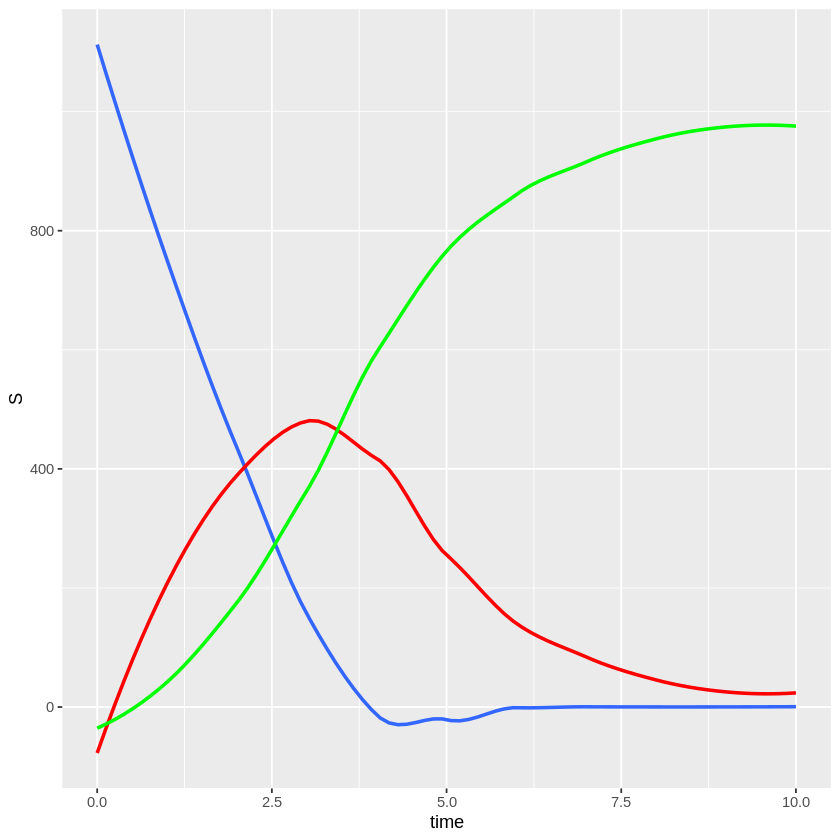

In [27]:
# generating the data 
df1 <- model_1 (beta = 0.004, gamma = 0.5, S0 = 999, I0 = 1, R0 = 0, times = seq(0, 10))
# plotting the data
SIRgraph<-ggplot(df1)+ geom_smooth(aes(time, S),method="auto", se=FALSE, fullrange=FALSE, level=0.95)+
geom_smooth(aes(time, I),method="auto", se=FALSE, color="red", fullrange=FALSE, level=0.95) +
geom_smooth(aes(time, R),method="auto", se=FALSE, color="green", fullrange=FALSE, level=0.95)
SIRgraph

In [13]:
# SI
model_2 <- function(beta, S0, I0, times) {
    #' Sim of SI (Susceptible and Infectious) infectious disease (ID) transmission model
  #' 
  #' @description Sim of SI with:
  #'    Susceptible (S) and Infectious (I).
  #'    
  #'  The model using this function on the Shiny app has default time in days, but units can be modified.
  #' Infected individuals do not recover and are not removed in this model. 
  #'    
  #' @param S : susceptible individuals : numeric
  #' @param I : infectious individuals : numeric
  #' @param beta : rate of infection : numeric
  #' @param tfinal : sim time (days) : numeric
  #' @usage si_model(S, I, beta, tfinal)
  #' @return The function returns the sim results taken from call
  #'   to deSolve app ordinary differential equation solver.
  #' @details A compartmental ID model with three compartments
  #'   simulated as a set of ODEs. This returns the output from odesolver as matrix,
  #'   with one column for each compartment. The content of the first column is time.
  #' @section Warning: 
  #'   This function does not check for errors. illogical parameters return "error"
  #' @export
  
# calculation of differentiation equation
  equation_2 <- function(time, variables, parameters) {
  with(as.list(c(variables, parameters)), {
    dS <- - beta*S*I
      dI <- beta*S*I
      return(list(c(dS, dI)))
  })
  }
  
#values initial for parameters :
  par_val2 <- c(beta  = beta)

# starting values of variables:
  start_values <- c(S = S0, I = I0)
  
# calculating the equation
  df2 <- as.data.frame(ode( start_values, times,  equation_2,  par_val2))

# returning the output:
  return(df2)
}

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



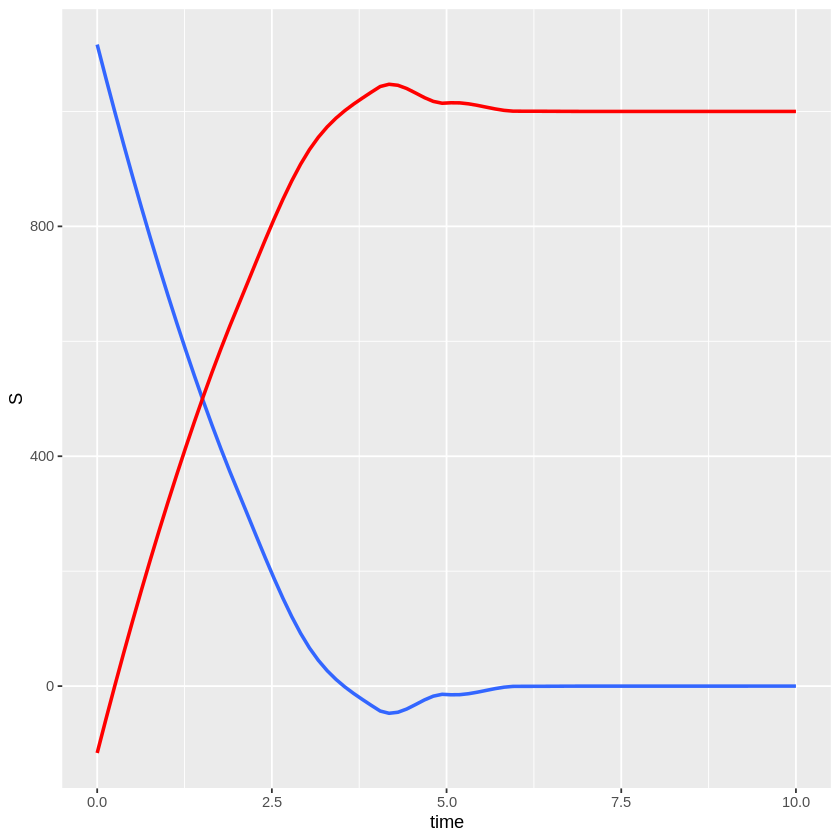

In [30]:
# generating data
df2 <- model_2(beta = 0.004, S0 = 999, I0 = 1, times = seq(0, 10))
# ploting a graph
SIgraph<-ggplot(df2)+ geom_smooth(aes(time, S),method="auto", se=FALSE, fullrange=FALSE, level=0.95)+
geom_smooth(aes(time, I),method="auto", se=FALSE, color="red", fullrange=FALSE, level=0.95)
SIgraph


In [15]:
# SEIR
model_3 <- function(beta,sigma,gamma, S0, I0, E0, R0, times) {
  
# calculation of differentiation equation
  equation_3 <- function(time, variables, parameters) {
  with(as.list(c(variables, parameters)), {
      dS <- - beta*S*I
      dE <- beta*S*I - sigma*E
      dI <- sigma*E - gamma*I
      dR <- gamma*I
      return(list(c(dS, dE, dI, dR)))
  })
  }
  
#values initial for parameters :
  par_val3 <- c(beta  = beta, gamma=gamma, sigma=sigma)

# starting values of variables:
  start_values <- c(S = S0, I= I0, E = E0 , R= R0)
  
# calculating the equation
  df3 <- as.data.frame(ode( start_values, times,  equation_3,  par_val3))

# returning the output:
  return(df3)
}

In [66]:
df3

time,S,I,E,R
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,9.990000e+02,1.00000,3.000000e+00,0.000000e+00
1,9.659483e+02,32.68502,1.611056e-01,4.205561e+00
2,3.408318e+02,679.00418,-1.512570e+02,1.344210e+02
3,6.018969e+00,1247.62887,-8.896280e+02,6.389801e+02
4,1.070384e-02,2045.19283,-2.472692e+03,1.430489e+03
5,4.225335e-08,4027.44818,-5.902404e+03,2.877955e+03
6,-1.023425e-08,8629.30611,-1.351163e+04,5.885319e+03
7,-3.965354e-08,19074.09621,-3.053151e+04,1.246041e+04
8,3.518237e-07,42610.99895,-6.870302e+04,2.709502e+04


`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



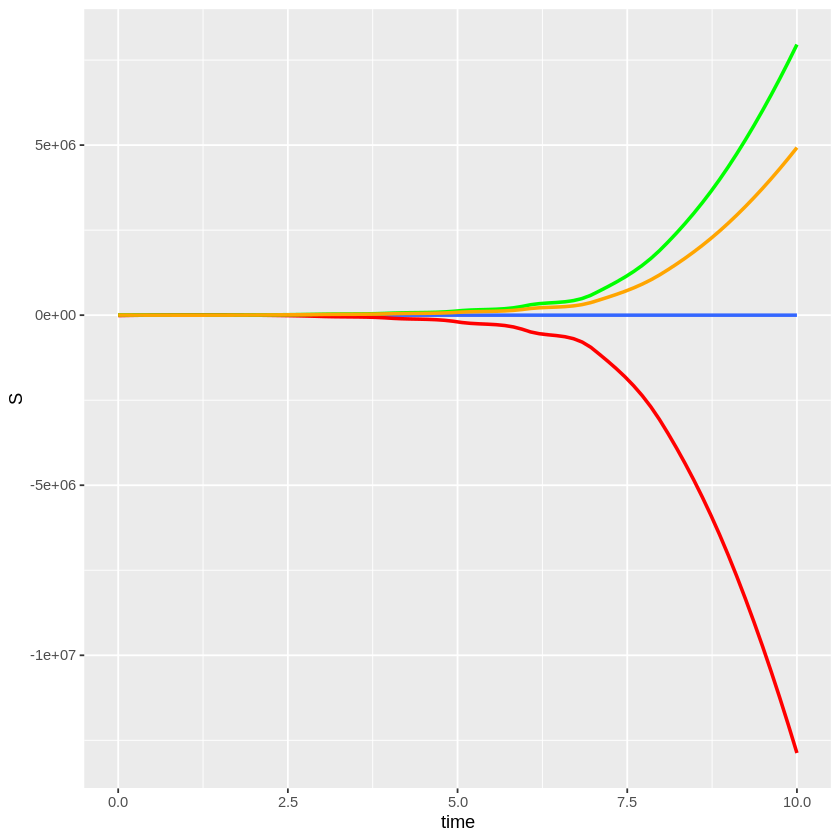

In [76]:
# generationg data
df3 <- model_3 (beta = 0.01, gamma = 0.5,sigma=0.5, S0 = 9999, E0=3, I0 = 1, R0 = 0, times = seq(0, 10))

# generating a graph
SEIRgraph<-ggplot(df3)+ geom_smooth(aes(time, S),method="auto", se=FALSE, fullrange=FALSE, level=0.95)+
geom_smooth(aes(time, E),method="auto", se=FALSE, color="red", fullrange=FALSE, level=0.95)+
geom_smooth(aes(time, I),method="auto", se=FALSE, color="green",fullrange=FALSE, level=0.95)+
geom_smooth(aes(time, R),method="auto", se=FALSE, color="orange",fullrange=FALSE, level=0.95)
SEIRgraph

uppose that 50% of the population is vaccinated against the epidemic.Assume γ=0.1 day⁻¹ and β=0.4 day⁻¹.The model is run for a time period of 6 years.

In [ ]:
model_3 <- function(beta,sigma,gamma, S0, I0, E0, R0, times) {
  
# calculation of differentiation equation
  equation_3 <- function(time, variables, parameters) {
  with(as.list(c(variables, parameters)), {
      dS <- - beta*S*I
      dE <- beta*S*I - sigma*E
      dI <- sigma*E - gamma*I
      dR <- gamma*I
      return(list(c(dS, dE, dI, dR)))
  })
  }
  
#values initial for parameters :
  par_val3 <- c(beta  = beta, gamma=gamma, sigma=sigma)

# starting values of variables:
  start_values <- c(S = S0, I= I0, E = E0 , R= R0)
  
# calculating the equation
  df3 <- as.data.frame(ode( start_values, times,  equation_3,  par_val3))

# returning the output:
  return(df3)
}

In [74]:
# impact of vaccination
#Loading libraries
library(ggplot2)
library(deSolve)
library(reshape2)

Model_4 <- function(beta,lambda,gamma, S0, I0, R0, times){
# model inputs 

start_val =c(S=0.60*999999,I=1,R=0.50*999999)
    
param =c(gamma=0.1,beta=0.4)
# time for the model
time=seq(from=1,to=6*365,by=1)

# SEIR model

model_4 <- function(time,variables,parameters){
  with(as.list(c(variables,parameters)),{
    N=S+I+R
    lambda=beta*(I/N)
    dS=-lambda*S
    dI=lambda*S-gamma*I
    dR=gamma*I
    
    return(list(c(dS,dI,dR)))
  }
  )
}

# differential equation
df4 <-as.data.frame(ode(start_val,model_4,param,time))

    # print the data
    return(df4)
    
    }
#Plot of prevalance

#Mod4graph <- ggplot(df4) + 
 #geom_smooth(aes(time, value),method="red", se=FALSE, fullrange=FALSE, level=0.95)
#Mod4graph



In [75]:
df4

time,variable,value
<dbl>,<fct>,<dbl>
1,S,599999.4
2,S,599999.2
3,S,599998.9
4,S,599998.6
5,S,599998.3
6,S,599997.9
7,S,599997.5
8,S,599997.0
9,S,599996.5


In [62]:
df4
ggplot(data = output, aes(x = time, y = I)) + 
  geom_line() + 
  xlab("Time(days)") +
  ylab("Number of Infected") + 
  labs("SIR Model: prevalence of infection")

time,variable,value
<dbl>,<fct>,<dbl>
1,S,599999.4
2,S,599999.2
3,S,599998.9
4,S,599998.6
5,S,599998.3
6,S,599997.9
7,S,599997.5
8,S,599997.0
9,S,599996.5


`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



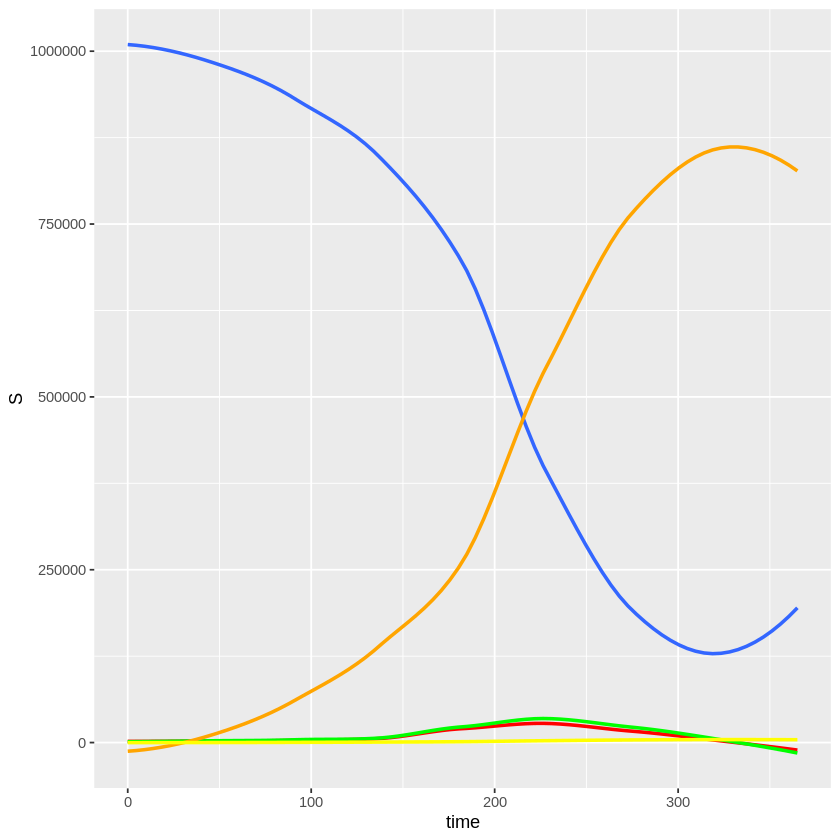

In [52]:
# lockdown

Model_5 <- function(beta,sigma,gamma, S0, I0, E0, R0, M0, times){

equation5 <- function(time, current_state, params){
  
    with(as.list(c(current_state, params)),{
      
      beta = ifelse(
        (time <= start_lockdown || time >= end_lockdown),
        0.5, 0.1
        )
      
      N <- S+E+I+R
      dS <- -(beta*S*I)/N
      dE <- (beta*S*I)/N - sigma*E
      dI <- sigma*E - gamma*I - mu*I
      dR <- gamma*I
      dM <- mu*I
      
      return(list(c(dS, dE, dI, dR, dM)))
    })
  }
parameters <- c(
    sigma=0.25,
    gamma=0.2,
    mu=0.01,
    start_lockdown=90,
    end_lockdown=150
    )
  
  start_param <- c(S=99999, E=200, I=40, R=0, M=0)
  
  times <- seq(from=1,to=365,by=1)
  
  df6 <- as.data.frame(ode(start_param , times,equation5, parameters))
# print the data
    return(df6 )
}

# generating a graph
Mod5graph <-ggplot(df6)+ geom_smooth(aes(time, S),method="auto", se=FALSE, fullrange=FALSE, level=0.95)+
geom_smooth(aes(time, E),method="auto", se=FALSE, color="red", fullrange=FALSE, level=0.95)+
geom_smooth(aes(time, I),method="auto", se=FALSE, color="green",fullrange=FALSE, level=0.95)+
geom_smooth(aes(time, R),method="auto", se=FALSE, color="orange",fullrange=FALSE, level=0.95)+
geom_smooth(aes(time, M),method="auto", se=FALSE, color="yellow",fullrange=FALSE, level=0.95)
Mod5graph

In [92]:
df6

time,S,E,I,R,M
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,999999.0,1.0000000,0.0000000,0.00000000,0.0000000000
1,999998.9,0.8288002,0.2037322,0.02176084,0.0001088042
2,999998.8,0.7699207,0.3458436,0.07743446,0.0003871723
3,999998.6,0.7790317,0.4573013,0.15808258,0.0007904129
4,999998.4,0.8319957,0.5559857,0.25951990,0.0012975995
5,999998.0,0.9161024,0.6525065,0.38034132,0.0019017066
6,999997.7,1.0251384,0.7534926,0.52082484,0.0026041242
7,999997.3,1.1566555,0.8634365,0.68233790,0.0034116895
8,999996.8,1.3104550,0.9857424,0.86702468,0.0043351234


𝑆(𝑡)	Susceptible compartment
𝐼(𝑡)	Infected compartment
𝑅(𝑡)	Recovered compartment
𝑑0	Death due to corona
𝜇	Natural death
b	Birth rate
𝛽	Protection rate
k	Constant rate
𝛼	Isolation rate
𝛾	Recovery rate

𝑑𝑆(𝑡)𝑑𝑡=𝑏−𝑘(1−𝛼𝑆(𝑡)𝐼(𝑡))−𝛼𝑘𝛽𝑆(𝑡)𝐼(𝑡)−𝜇𝑆(𝑡)𝑑𝐼(𝑡)𝑑𝑡=𝑘(1−𝛼𝑆(𝑡)𝐼(𝑡))+𝛼𝑘𝛽𝑆(𝑡)𝐼(𝑡)−(𝑑0+𝛾+𝜇)𝐼(𝑡)𝑑𝑅(𝑡)𝑑𝑡=𝛾𝐼(𝑡)−𝜇𝑅(𝑡).

In [125]:
#https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7893319/
#Ncovid 19
model_6 <- function(beta, gamma,alpha,Mu, S0, I0, R0,St,It,k,d0,Rt, times) {
    
# calculation of differentiation equation
equation7 <- function(time, variables, parameters) {
    with(as.list(c(variables, parameters)), {
dS <- beta * k*(1-alpha*St*It) -alpha*k*beta* St*It
dI <- k*(1-alpha* St*It)+ alpha + k +beta*St*It - (d0 + gamma + Mu)*It
dR <-  gamma * It - Mu* Rt
        return(list(c(dS, dI, dR)))
  })
    
    }

#values initial for parameters :
  par_val <- c(beta = beta, gamma = gamma, alpha = alpha, Mu = Mu,St=St,It=It,k=k,d0=d0,Rt=Rt)

# starting values of variables:
  start_values <- c(S = S0, I = I0, R = R0)
  
# calculating the equation
  df7 <- as.data.frame(ode( start_values, times, equation7,  par_val))

# returning the output:
  return(df7)
    }

In [126]:
df7 <- model_6(beta=0.01, gamma=0.5,alpha=0.5,Mu=0.1, S0=999, I0=2, R0=0,St=999,It=2,k=1,d0=0.02,Rt=1, times=seq(0, 10))

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



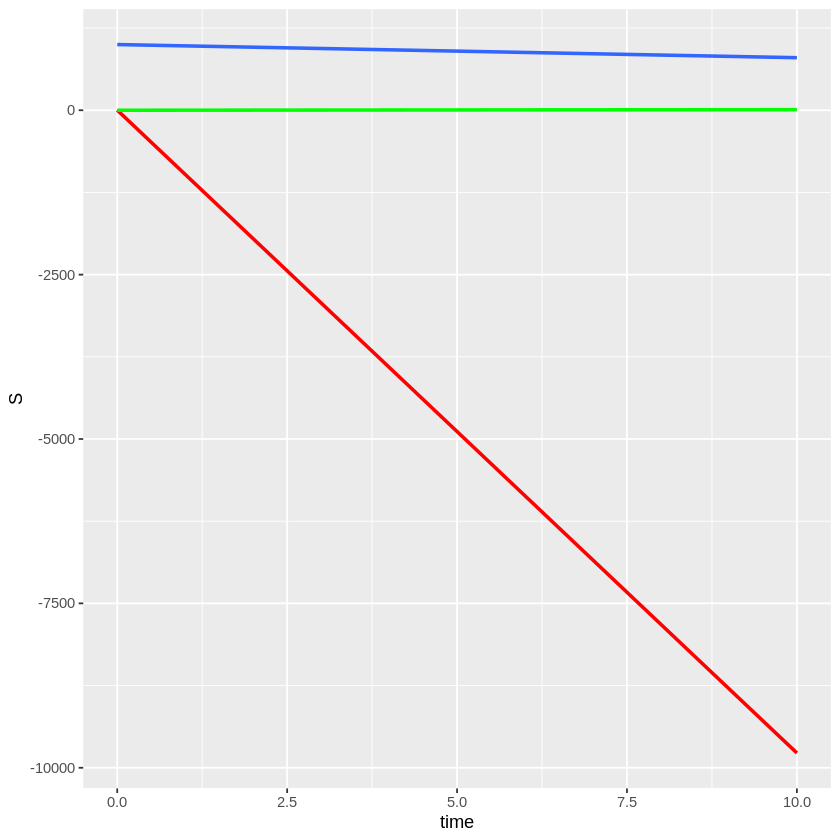

In [127]:
model6graph <- ggplot(df7)+ geom_smooth(aes(time, S),method="auto", se=FALSE, fullrange=FALSE, level=0.95)+
geom_smooth(aes(time, I),method="auto", se=FALSE, color="red", fullrange=FALSE, level=0.95) +
geom_smooth(aes(time, R),method="auto", se=FALSE, color="green", fullrange=FALSE, level=0.95)
model6graph